## Medical Costs

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
sns.set(style='whitegrid', context='notebook')

### Downloading data

In [8]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analize

(1338, 7)


<Axes: >

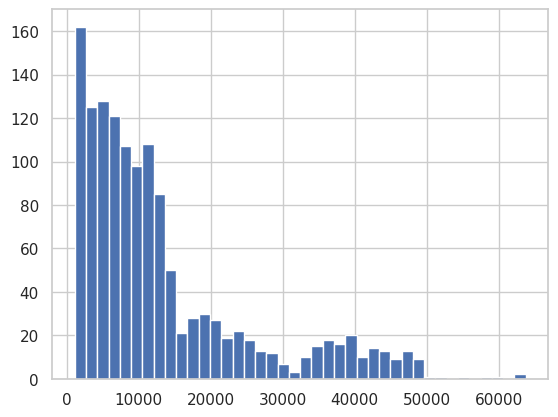

In [9]:
print(df.shape)
df.charges.hist(bins=40)

Remove outliers

In [10]:
df[df.charges > 50000]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [11]:
df = df[df.charges < 50000]

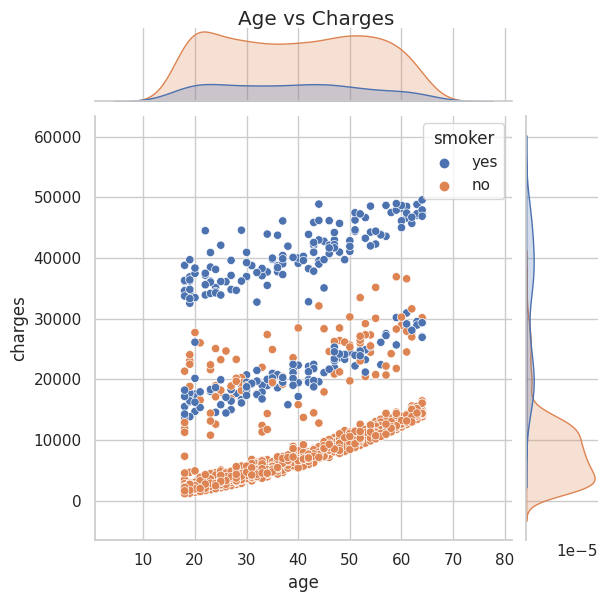

In [12]:
p = sns.jointplot(data = df, x = 'age', y = 'charges', hue = 'smoker')
p.fig.suptitle('Age vs Charges',y = 1.0)
plt.show()

In [13]:
from scipy import stats

### Correlation

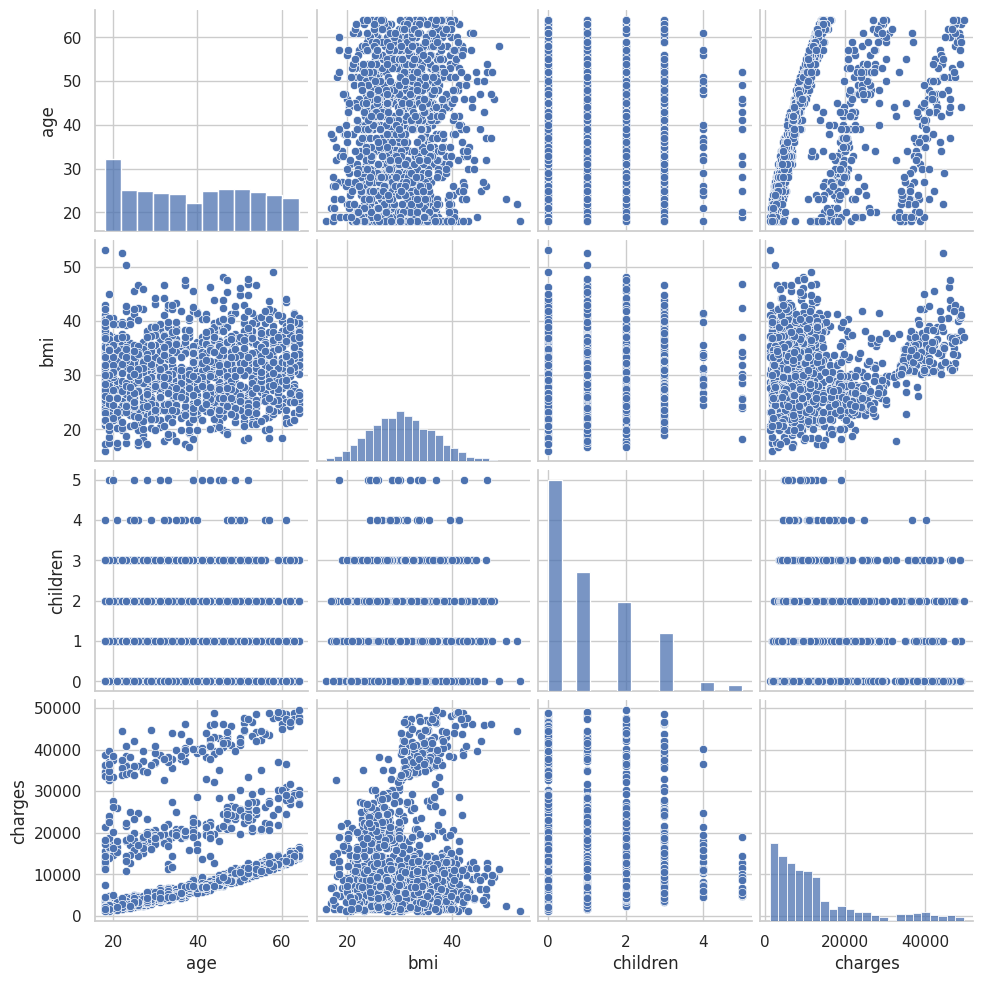

In [14]:
sns.pairplot(df, height=2.5)
plt.show()

In [15]:
import numpy as np

<Axes: >

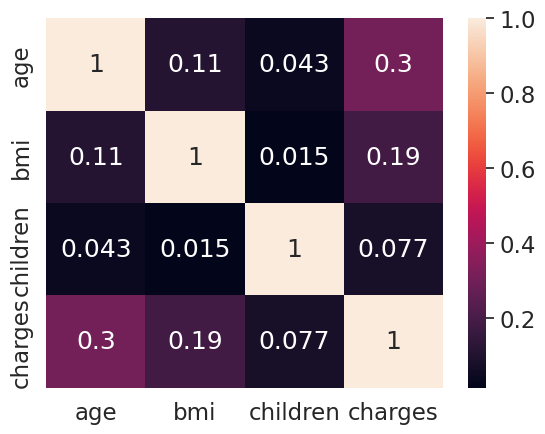

In [16]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
cor = np.corrcoef(df[numeric_cols].values.T)
sns.set(font_scale=1.5)
sns.heatmap(cor, annot=True, yticklabels=numeric_cols, xticklabels=numeric_cols)

#### One-hot encoding for categorical variables

In [17]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

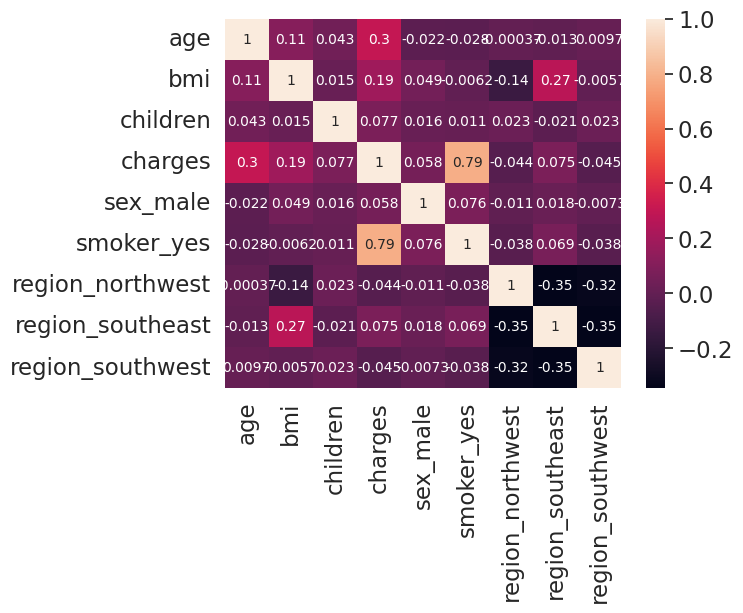

In [18]:
sns.heatmap(df[df.columns].corr(), annot=True, cbar=True, annot_kws={'fontsize':10})


### Creating Models

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
X_cols = list(set(df.columns) - set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_fit = StandardScaler().fit(X_train)
y_fit = StandardScaler().fit(y_train)

X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)
y_train = y_fit.transform(y_train)
y_test = y_fit.transform(y_test)


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred[:10]

array([[ 1.5726076 ],
       [-0.74821611],
       [ 0.4374019 ],
       [-0.25583303],
       [ 1.12490452],
       [-0.12760921],
       [-0.43787002],
       [ 1.50053887],
       [-0.63204878],
       [ 0.17520213]])

In [22]:
# Fitting the scaler on the training data only
# Using fit_transform instead of fit and transform separately:
sc = StandardScaler()
X = df.drop(columns=['charges'])
y = df[['charges']]

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred[:10]

array([[ 0.01099605],
       [-0.64599935],
       [-0.11941237],
       [-0.44749713],
       [-0.90105502],
       [-0.91554361],
       [ 0.0237961 ],
       [-0.41040992],
       [ 1.6956213 ],
       [-0.68202803]])

In [23]:
y_pred.shape

(333, 1)

### Metrics Functions 

In [24]:
import sklearn.metrics as metrics

In [25]:
mse = metrics.mean_squared_error(y_test, y_pred)

r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.7194
mse:  0.2901


In [ ]:
!pip install setuptools==58
!pip install regressors

In [29]:
from regressors import stats

In [30]:
model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [31]:
y_test = y_test.reshape(-1)

print("---------------- Summary ----------------")
stats.summary(model, X_test, y_test, X_cols)

---------------- Summary ----------------
Residuals:
    Min      1Q  Median     3Q    Max
-1.8925 -0.1533  0.0634 0.2152 0.9679


Coefficients:
                  Estimate  Std. Error  t value   p value
_intercept        0.000000    0.029834   0.0000  1.000000
children          0.052258    0.029010   1.8014  0.072545
age               0.303223    0.028970  10.4667  0.000000
region_northwest -0.034686    0.033105  -1.0478  0.295506
region_southeast -0.032441    0.034833  -0.9313  0.352355
region_southwest -0.048901    0.036640  -1.3347  0.182905
bmi               0.158003    0.030645   5.1558  0.000000
sex_male         -0.020871    0.029706  -0.7026  0.482810
smoker_yes        0.800165    0.029183  27.4193  0.000000
---
R-squared:  0.71942,    Adjusted R-squared:  0.71249
F-statistic: 103.84 on 8 features


Calculate residuals

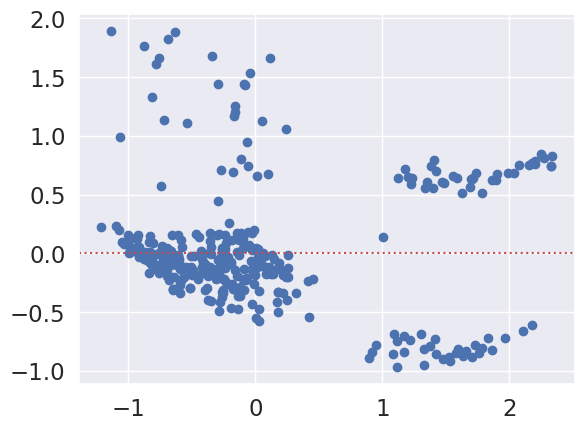

In [39]:
residuals =  np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

### Second model

In [52]:
df2 = df.copy()
df2['age2'] = df2.age**2
df2['overweight'] = (df2.bmi >= 30).astype(int)
df2['overweight*smoker'] = df2.overweight * df2.smoker_yes

In [75]:
X_cols = ['overweight*smoker', 'smoker_yes', 'age2', 'children']
y_col = ['charges']

X = df2[X_cols].values
y = df2[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_fit = StandardScaler().fit(X_train)
y_fit = StandardScaler().fit(y_train)

X_train = X_fit.transform(X_train)
X_test = X_fit.transform(X_test)
y_train = y_fit.transform(y_train)
y_test = y_fit.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [76]:
mse = metrics.mean_squared_error(y_test, y_pred)

r2 = metrics.r2_score(y_test, y_pred)

print('r2: ', r2.round(4))
print('mse: ', mse.round(4))

r2:  0.876
mse:  0.1198


In [77]:
model.coef_ = model.coef_.reshape(-1)

In [78]:
y_test = y_test.reshape(-1)

print("---------------- Summary ----------------")
stats.summary(model, X_test, y_test, X_cols)

---------------- Summary ----------------
Residuals:
    Min     1Q  Median     3Q   Max
-1.8724 0.0778  0.1193 0.1435 0.373


Coefficients:
                   Estimate  Std. Error  t value   p value
_intercept         0.000000    0.019133   0.0000  1.000000
overweight*smoker  0.499201    0.024747  20.1718  0.000000
smoker_yes         0.448557    0.024600  18.2343  0.000000
age2               0.322890    0.019450  16.6008  0.000000
children           0.066938    0.018550   3.6086  0.000355
---
R-squared:  0.87602,    Adjusted R-squared:  0.87451
F-statistic: 579.38 on 4 features


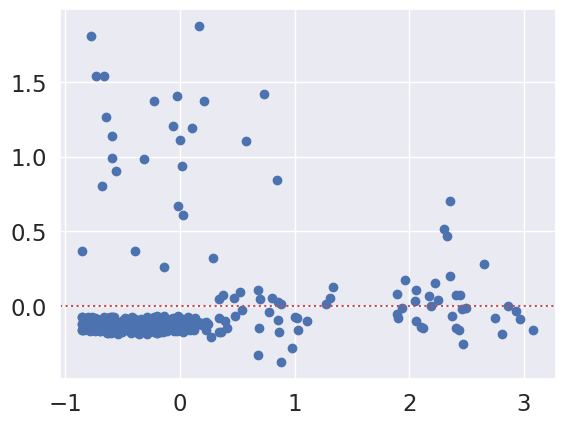

In [79]:
residuals =  np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle=':')
plt.show()